In [1]:
import scanpy as sc
import json
import numpy as np
import matplotlib.pyplot as plt
# Consider aesthetics
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['axes.axisbelow'] = True
plt.rcParams.update({'font.size': 17})

In [2]:
adata = sc.read("datasets/immune_adata.h5ad")

In [3]:
with open('Genesets/Immune/BCELLS.json', 'r') as file:
    bcell_gene_set = json.load(file)
    bcell_gene_set = bcell_gene_set['genes']
    
with open('Genesets/Immune/TCELLS.json', 'r') as file:
    tcell_gene_set = json.load(file)
    tcell_gene_set = tcell_gene_set['genes']
    
with open('Genesets/Immune/MPHAGES.json','r') as file:
    mphages_gene_set = json.load(file)
    mphages_gene_set = mphages_gene_set['genes']
    
    
bcell_gene_set_final = set(adata.var_names) & set(bcell_gene_set)
print(f"Genes removed from the gene set: {len(set(bcell_gene_set) - bcell_gene_set_final)} out of {len(bcell_gene_set)}\n")

tcell_gene_set_final = set(adata.var_names) & set(tcell_gene_set)
print(f"Genes removed from the gene set: {len(set(tcell_gene_set) - tcell_gene_set_final)} out of {len(tcell_gene_set)}\n")

mphages_gene_set_final = set(adata.var_names) & set(mphages_gene_set)
print(f"Genes removed from the gene set: {len(set(mphages_gene_set) - mphages_gene_set_final)} out of {len(mphages_gene_set)}\n")

Genes removed from the gene set: 2 out of 34

Genes removed from the gene set: 2 out of 19

Genes removed from the gene set: 1 out of 33



In [4]:
adata

AnnData object with n_obs × n_vars = 173 × 27664
    obs: 'tumor_groups', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier', 'Ground labels', 'type', 'Ground cell type', 'average link Predictions', 'ward link Predictions', 'Spectral Predictions', 'GMM Predictions', 'stromal_score', 'immune_score', 'estimate_score', 'tumor_purity', 'NMF Predictions'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'GMM Predictions_colors', 'Ground cell type_colors', 'Ground labels_colors', 'NMF Predictions_colors', 'Spectral Predictions_colors', 'average link Predictions_colors', 'log1p', 'neighbors', 'pca', 'tsne', 'tumor_groups_colors', 'umap', 'ward link Predictions_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

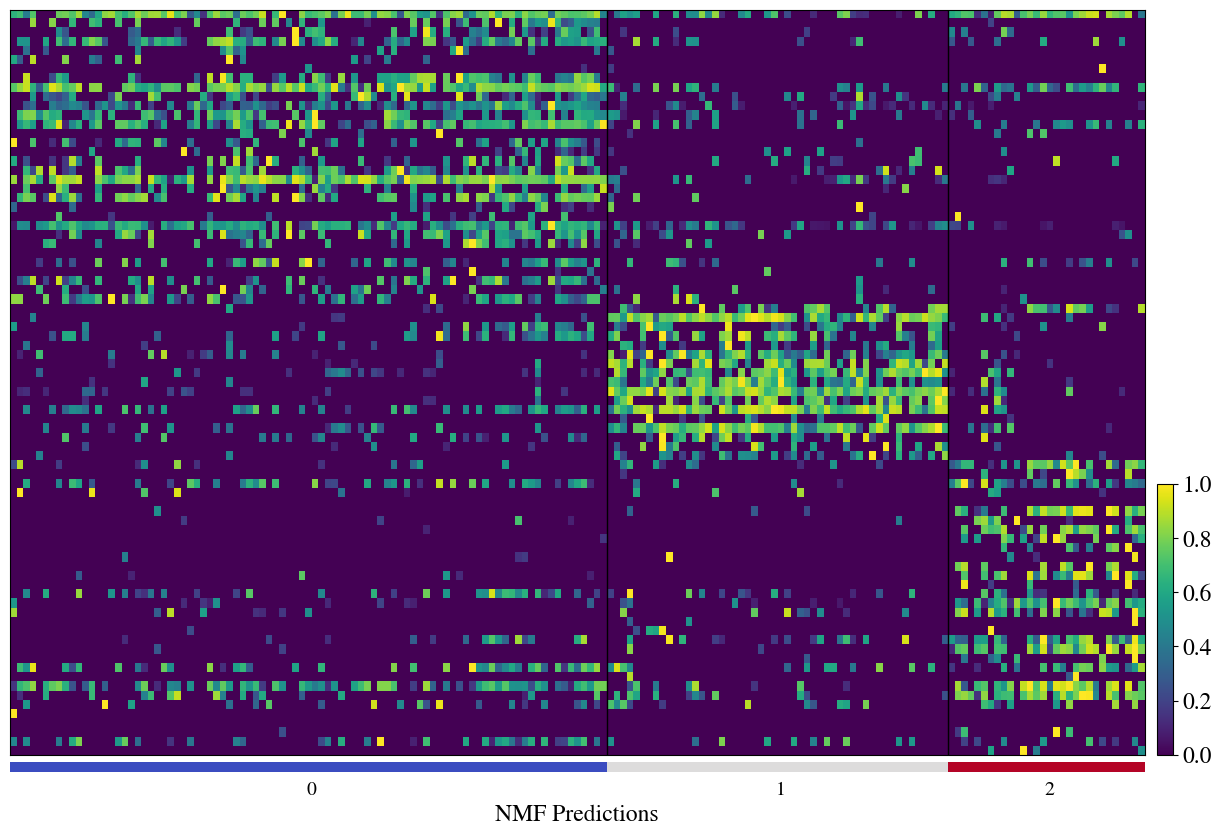

In [5]:
total_genes = list(bcell_gene_set_final) + list(tcell_gene_set_final) + list(mphages_gene_set_final)
adata = adata[:,total_genes]
sc.pl.heatmap(adata, var_names=total_genes , groupby='NMF Predictions', use_raw=False, show=True,swap_axes=True, figsize=(15,10),standard_scale='var')

From the above its evident that the cluster with label 0 expresses the BCELL related geneset, cluster 1 expresses the TCELL related geneset and cluster 2 expresses the Macrophage related geneset. Thus we can name the clusters accordingly.

In [6]:
adata.obs['NMF Predictions']

BC02_60       2
BC03_03       0
BC03_06       0
BC03_24       0
BC03_25       1
             ..
BC09_Re_94    1
BC09_Re_95    1
BC10_07       2
BC10_43       2
BC11_28       1
Name: NMF Predictions, Length: 173, dtype: category
Categories (3, object): ['0', '1', '2']

In [7]:
label_mapping = {'0': "B-CELL", '1': "T-CELL", '2': "MP-CELL"}
adata.obs['NMF Predictions'] = [label_mapping[label] for label in adata.obs['NMF Predictions']]

/tmp/ipykernel_6160/3168979202.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['NMF Predictions'] = [label_mapping[label] for label in adata.obs['NMF Predictions']]


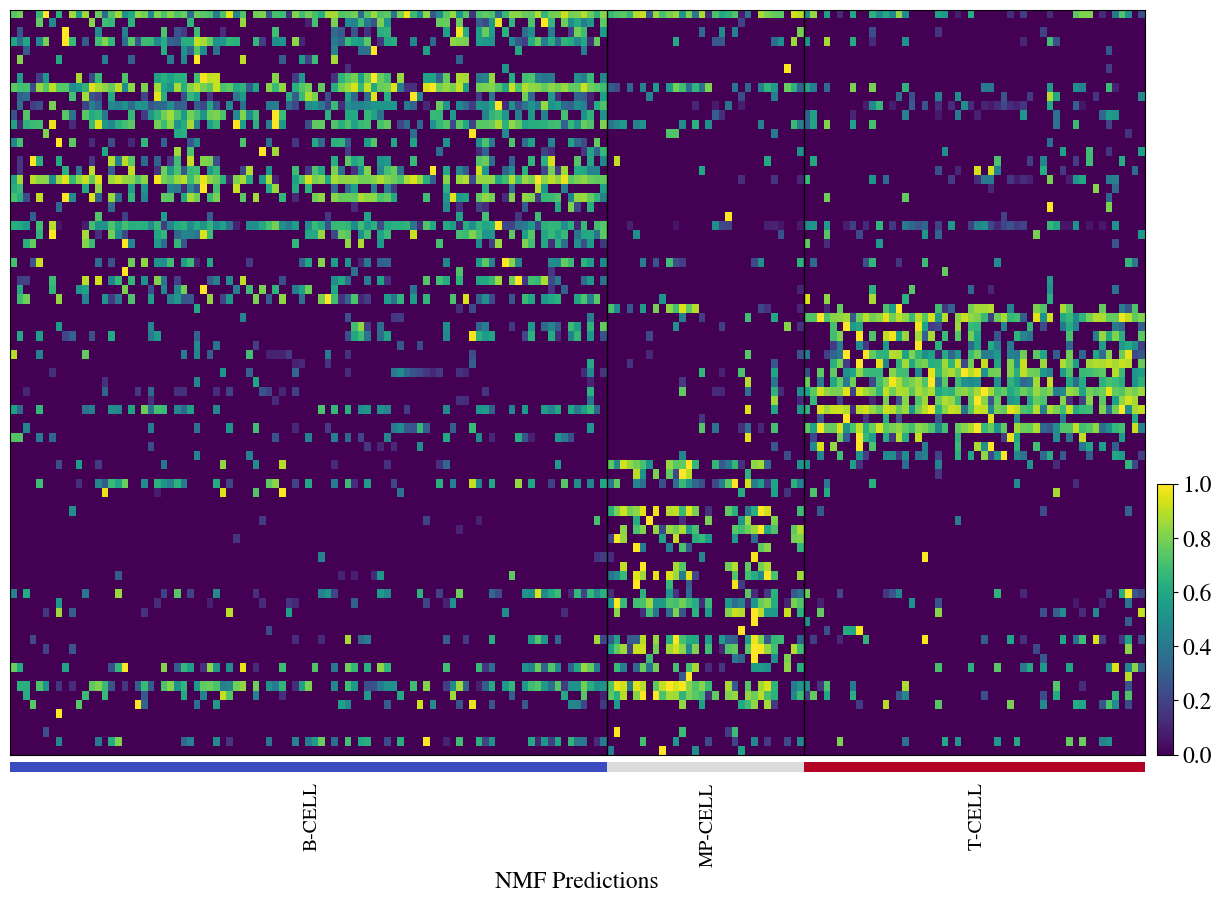

In [8]:
sc.pl.heatmap(adata, var_names=total_genes , groupby='NMF Predictions', use_raw=False, show=True,swap_axes=True, figsize=(15,10),standard_scale='var')

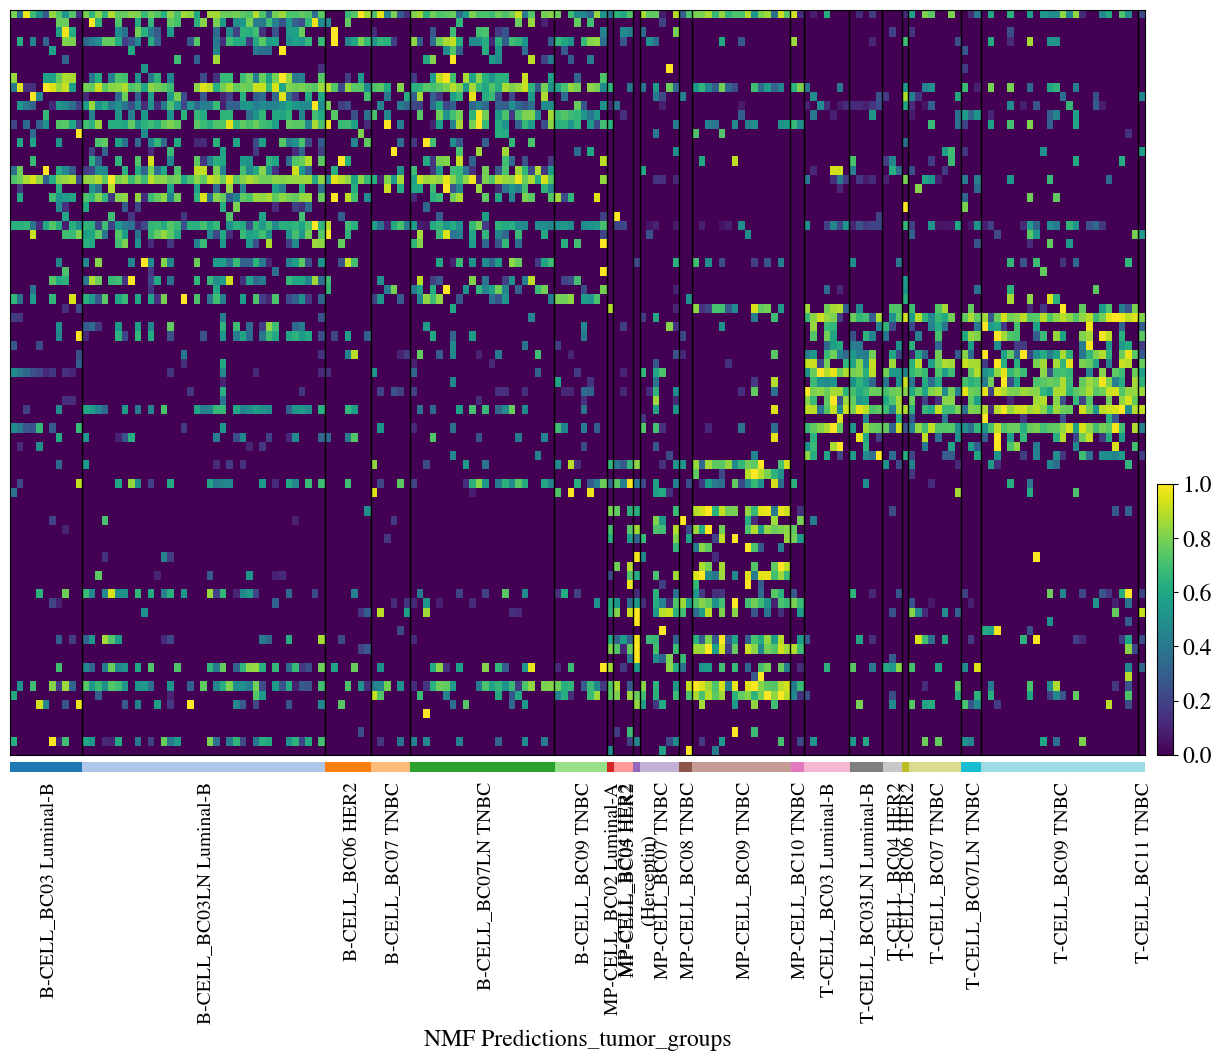

In [9]:
sc.pl.heatmap(adata, var_names=total_genes , groupby=['NMF Predictions','tumor_groups'], use_raw=False, show=True,swap_axes=True, figsize=(15,10),standard_scale='var')

**T-cells Classification** 

In [10]:
adata = sc.read("datasets/immune_adata.h5ad")

adata_tcells = adata[adata.obs['Ground cell type']=='Tcell'].copy()
adata_tcells.obs = adata_tcells.obs.loc[adata_tcells.obs_names]

with open('Genesets/Tcells/Tcell_signature_gene_sets.json', 'r') as file:
    t_cells = json.load(file)

for key in t_cells.keys():
    t_cells_final = set(adata_tcells.var_names) & set(t_cells[key])
    print(f"Genes removed from the gene set: {len(set(t_cells[key]) - t_cells_final)} out of {len(t_cells[key])} from the {key} part.\n")
    
t_cells_final = {key: set(adata_tcells.var_names) & set(t_cells[key]) for key in t_cells.keys()}     

total_genes = [gene for key in t_cells_final.keys() for gene in t_cells_final[key]]
adata_tcells = adata_tcells[:,total_genes]

Genes removed from the gene set: 0 out of 7 from the Cytotoxic part.

Genes removed from the gene set: 0 out of 6 from the Exhausted part.

Genes removed from the gene set: 0 out of 7 from the Regulatory part.

Genes removed from the gene set: 0 out of 4 from the Naïve part.

Genes removed from the gene set: 0 out of 6 from the Costimulatory part.

Genes removed from the gene set: 0 out of 43 from the G1/S part.

Genes removed from the gene set: 0 out of 55 from the G2/M part.



In [11]:
t_cells_final.keys()

dict_keys(['Cytotoxic', 'Exhausted', 'Regulatory', 'Naïve', 'Costimulatory', 'G1/S', 'G2/M'])

0 = Cytotoxic

1 = Exhausted

2 = Regulatory

3 = Naïve

4 = Costimulatory

5 = G1/S

6 = G2/M

In [12]:
t_cells_final_numbered = {str(i): t_cells_final[key] for i, key in enumerate(t_cells_final)}

In [13]:
def set_the_class(adata,predicted_genes_name,predicted_class_name):
    for label, geneset in t_cells_final_numbered.items():
        # Find the cells in adata_tcells with the predicted genes in the current geneset
        cells_with_geneset = adata.obs[adata.obs[predicted_genes_name].apply(lambda x: x == geneset)].index
        # Assign the label to the corresponding cells in adata_tcells.obs['predicted_tcells']
        adata.obs.loc[cells_with_geneset, predicted_class_name] = label
    sc.pl.heatmap(adata, var_names=total_genes , groupby=[predicted_class_name,'tumor_groups'], use_raw=False, show=True,swap_axes= False, figsize=(20,15), standard_scale='var')
    return adata

**Classification using KMeans**

In [14]:
from sklearn.cluster import KMeans
data = adata_tcells.X

n_clusters = len(t_cells_final)
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(data)

predicted_labels = kmeans.labels_

adata_tcells.obs['predicted_genes_Kmeans'] = [t_cells_final_numbered[str(label)] for label in predicted_labels]

/tmp/ipykernel_6160/1933880394.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_tcells.obs['predicted_genes_Kmeans'] = [t_cells_final_numbered[str(label)] for label in predicted_labels]


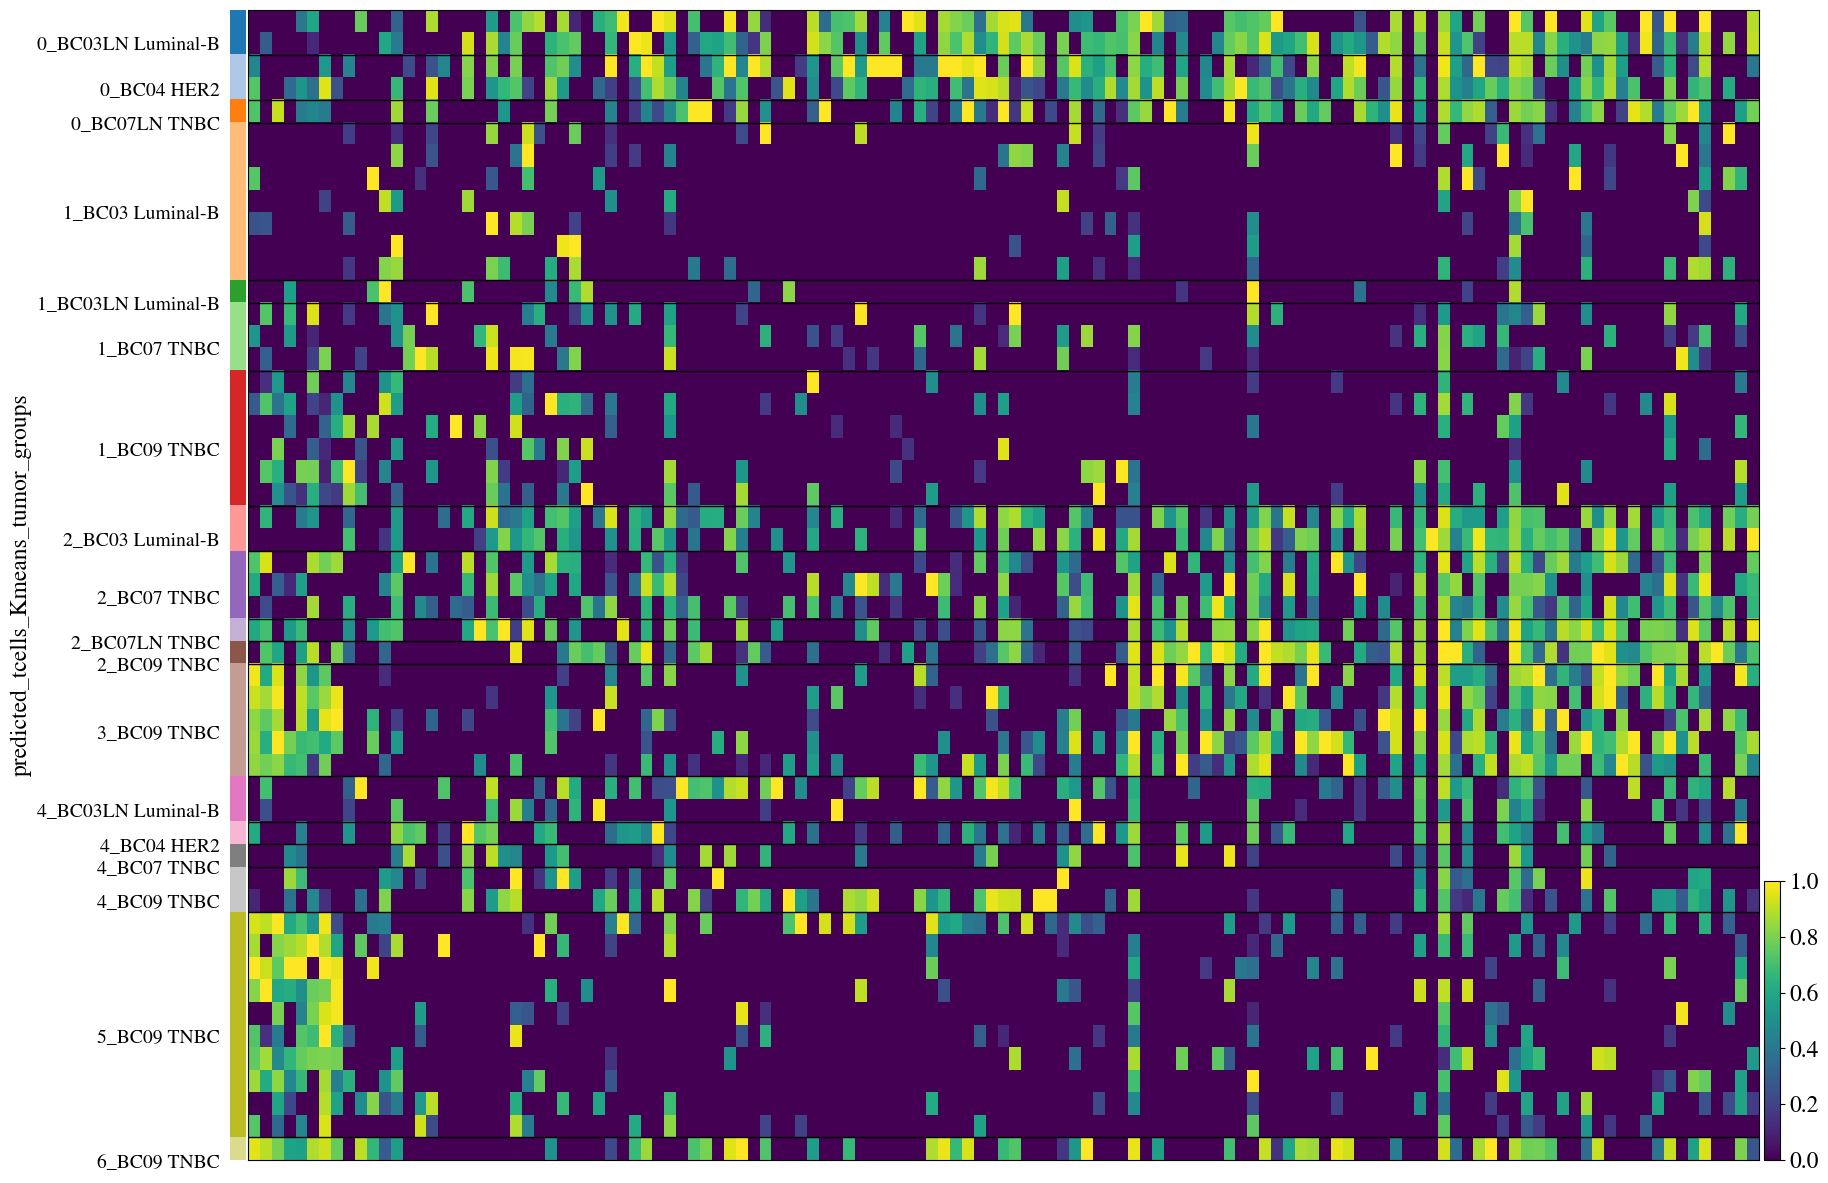

In [15]:
adata_tcells = set_the_class(adata_tcells, 'predicted_genes_Kmeans', 'predicted_tcells_Kmeans')

**Classification using Gaussian Micture Models**

In [16]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=n_clusters, random_state=0)
gmm.fit(data)

predicted_labels = gmm.predict(data)

adata_tcells.obs['predicted_genes_gmm'] = [t_cells_final_numbered[str(label)] for label in predicted_labels]


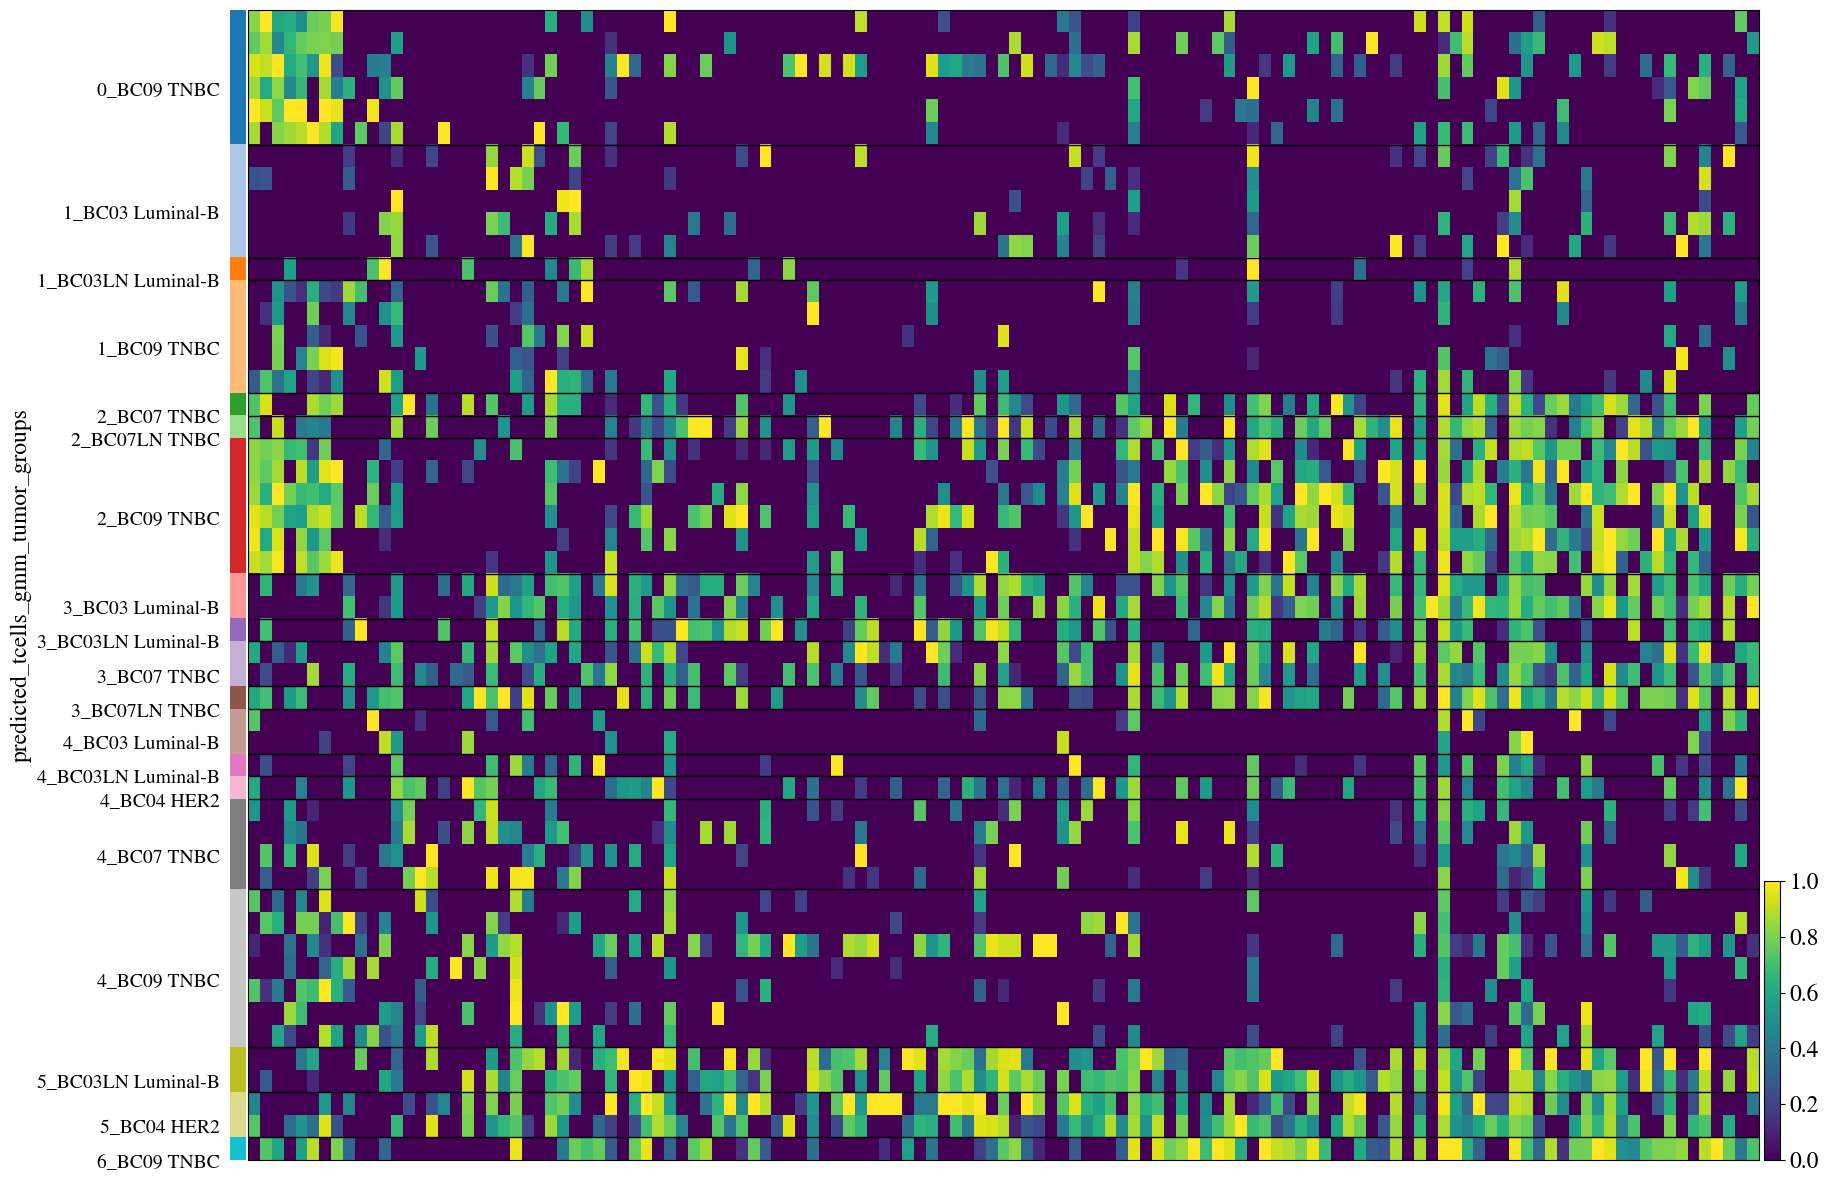

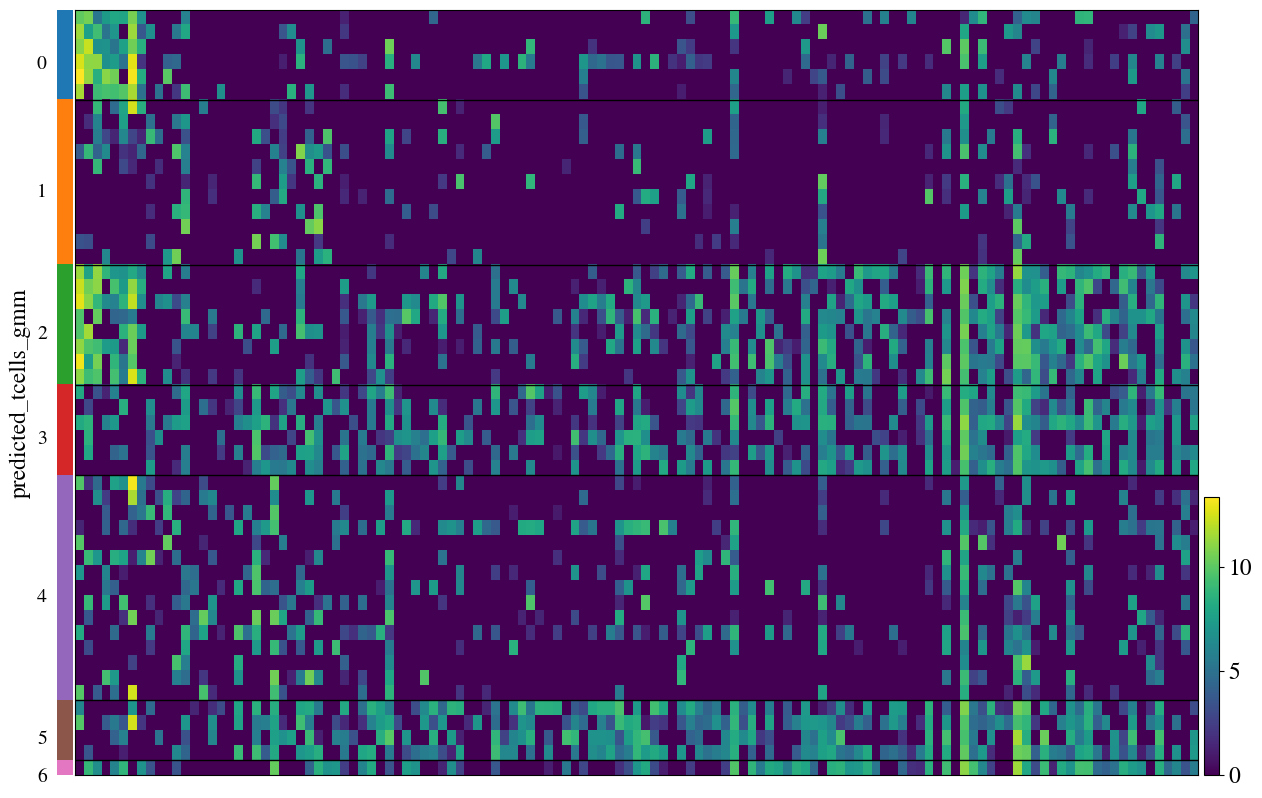

In [17]:
adata_tcells = set_the_class(adata_tcells, 'predicted_genes_gmm', 'predicted_tcells_gmm')
sc.pl.heatmap(adata_tcells, var_names=total_genes , groupby='predicted_tcells_gmm', use_raw=False, show=True,swap_axes= False, figsize=(15,10))

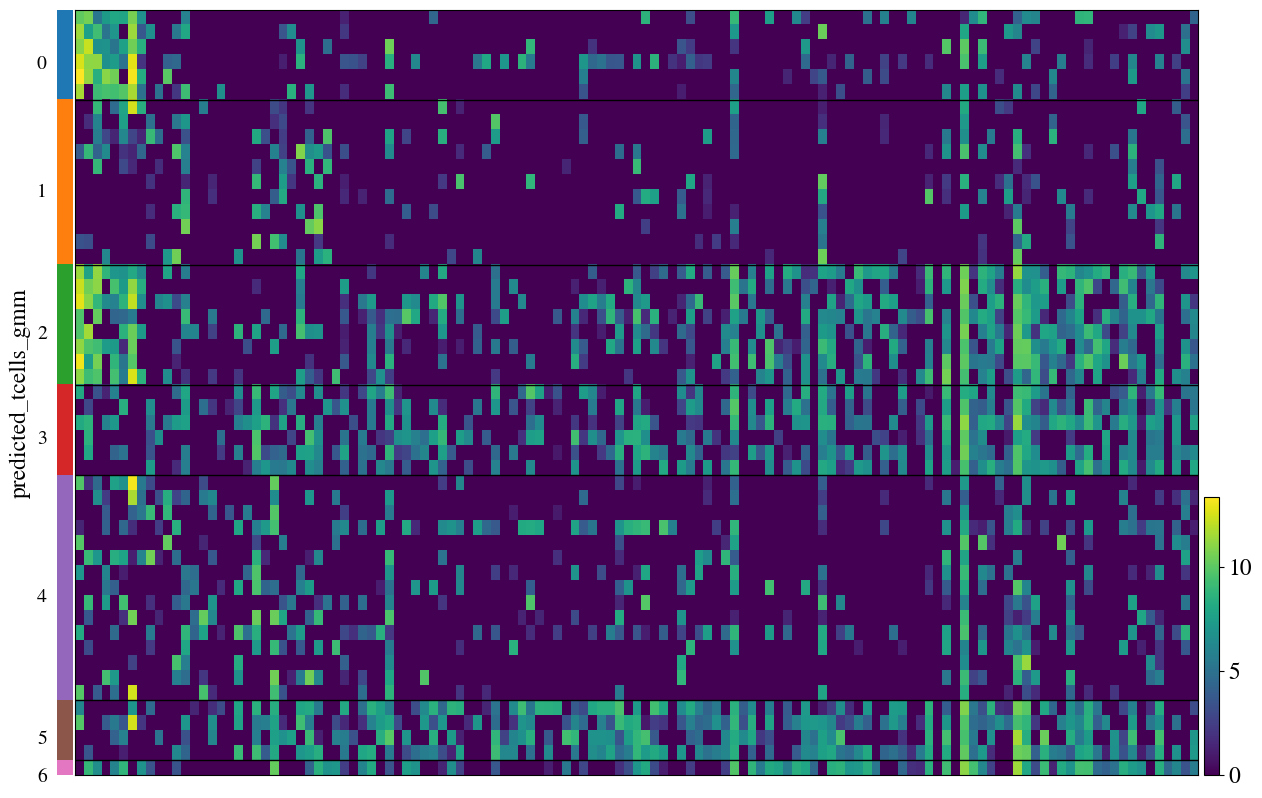

In [18]:
sc.pl.heatmap(adata_tcells, var_names=total_genes , groupby='predicted_tcells_gmm', use_raw=False, show=True,swap_axes= False, figsize=(15,10))

**Classification with Hierarhical clustering**

In [27]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters = n_clusters, linkage = 'ward')
predicted_labels = clustering.fit_predict(data)

# Assign the predicted cluster labels to your dataset
adata_tcells.obs['predicted_clusters_hierarchical'] = predicted_labels

# Alternatively, if you want to assign labels from t_cells_final_numbered dictionary
labels = [str(label) for label in predicted_labels]
labels_mapped = [t_cells_final_numbered[label] for label in labels]
adata_tcells.obs['predicted_clusters_hierarchical'] = labels_mapped


In [32]:
adata_tcells.obs['predicted_clusters_hierarchical']

BC03_03         {IL7, TGFBI, IL4R, TGFB1, TGFB3, IL2RA, TGFBR1}
BC03_25         {IL7, TGFBI, IL4R, TGFB1, TGFB3, IL2RA, TGFBR1}
BC03_50               {LAG3, BTLA, PDCD1, HAVCR2, CTLA4, TIGIT}
BC03_57         {IL7, TGFBI, IL4R, TGFB1, TGFB3, IL2RA, TGFBR1}
BC03_58       {TNFRSF25, TNFRSF9, SLAMF1, ICOS, TNFRSF14, CD...
BC03_66         {IL7, TGFBI, IL4R, TGFB1, TGFB3, IL2RA, TGFBR1}
BC03_78         {IL7, TGFBI, IL4R, TGFB1, TGFB3, IL2RA, TGFBR1}
BC03_85         {IL7, TGFBI, IL4R, TGFB1, TGFB3, IL2RA, TGFBR1}
BC03_94         {IL7, TGFBI, IL4R, TGFB1, TGFB3, IL2RA, TGFBR1}
BC03LN_53     {ATAD2, CHAF1B, WDR76, RRM2, CDC6, NASP, POLA1...
BC03LN_56       {IL7, TGFBI, IL4R, TGFB1, TGFB3, IL2RA, TGFBR1}
BC03LN_73       {IL7, TGFBI, IL4R, TGFB1, TGFB3, IL2RA, TGFBR1}
BC03LN_78     {TNFRSF25, TNFRSF9, SLAMF1, ICOS, TNFRSF14, CD...
BC03LN_91     {TNFRSF25, TNFRSF9, SLAMF1, ICOS, TNFRSF14, CD...
BC04_66               {LAG3, BTLA, PDCD1, HAVCR2, CTLA4, TIGIT}
BC04_89       {TNFRSF25, TNFRSF9, SLAMF1

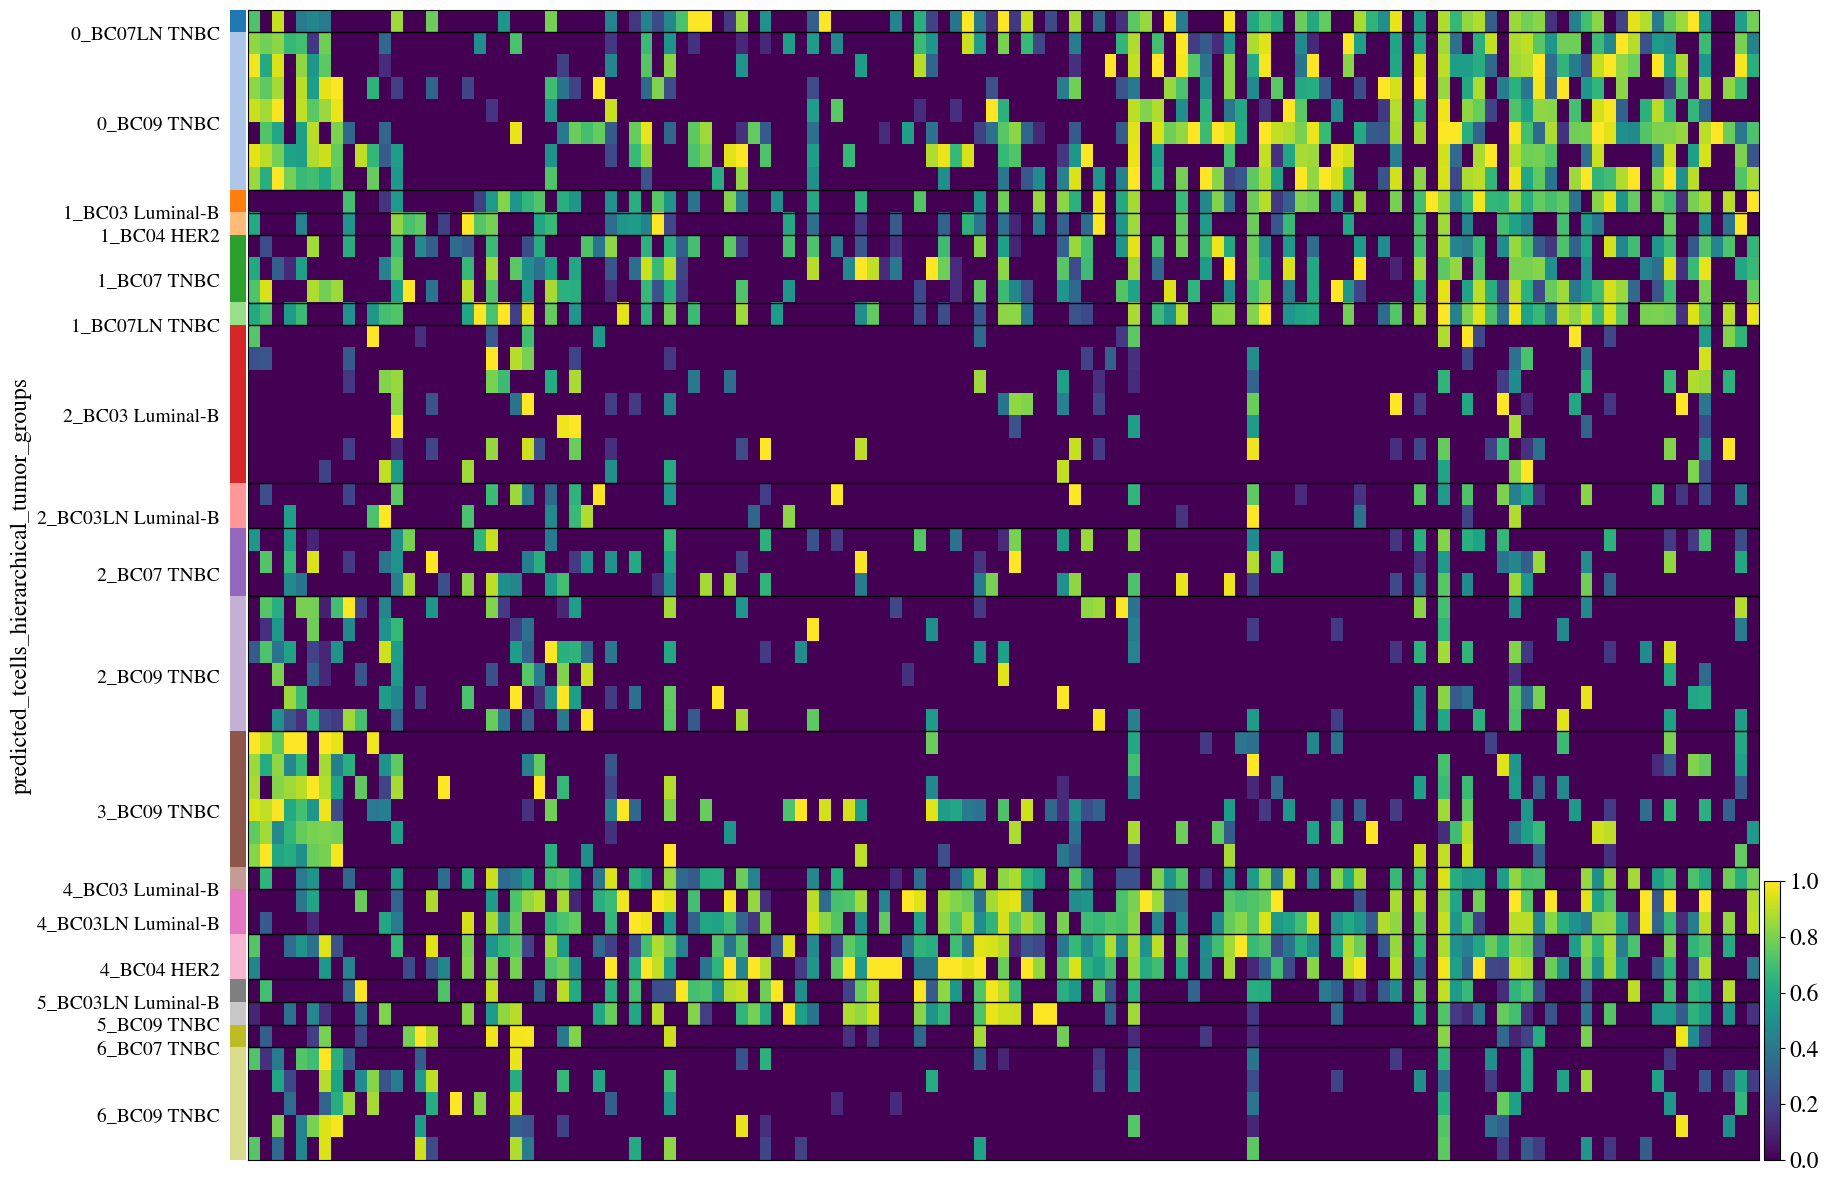

In [28]:
adata_tcells = set_the_class(adata_tcells, 'predicted_clusters_hierarchical', 'predicted_tcells_hierarchical')

**Classification with SVM**

In [33]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0)
svm.fit(data, labels)
predicted_labels = svm.predict(data)
adata_tcells.obs['predicted_genes_svm'] = [t_cells_final_numbered[str(label)] for label in predicted_labels]


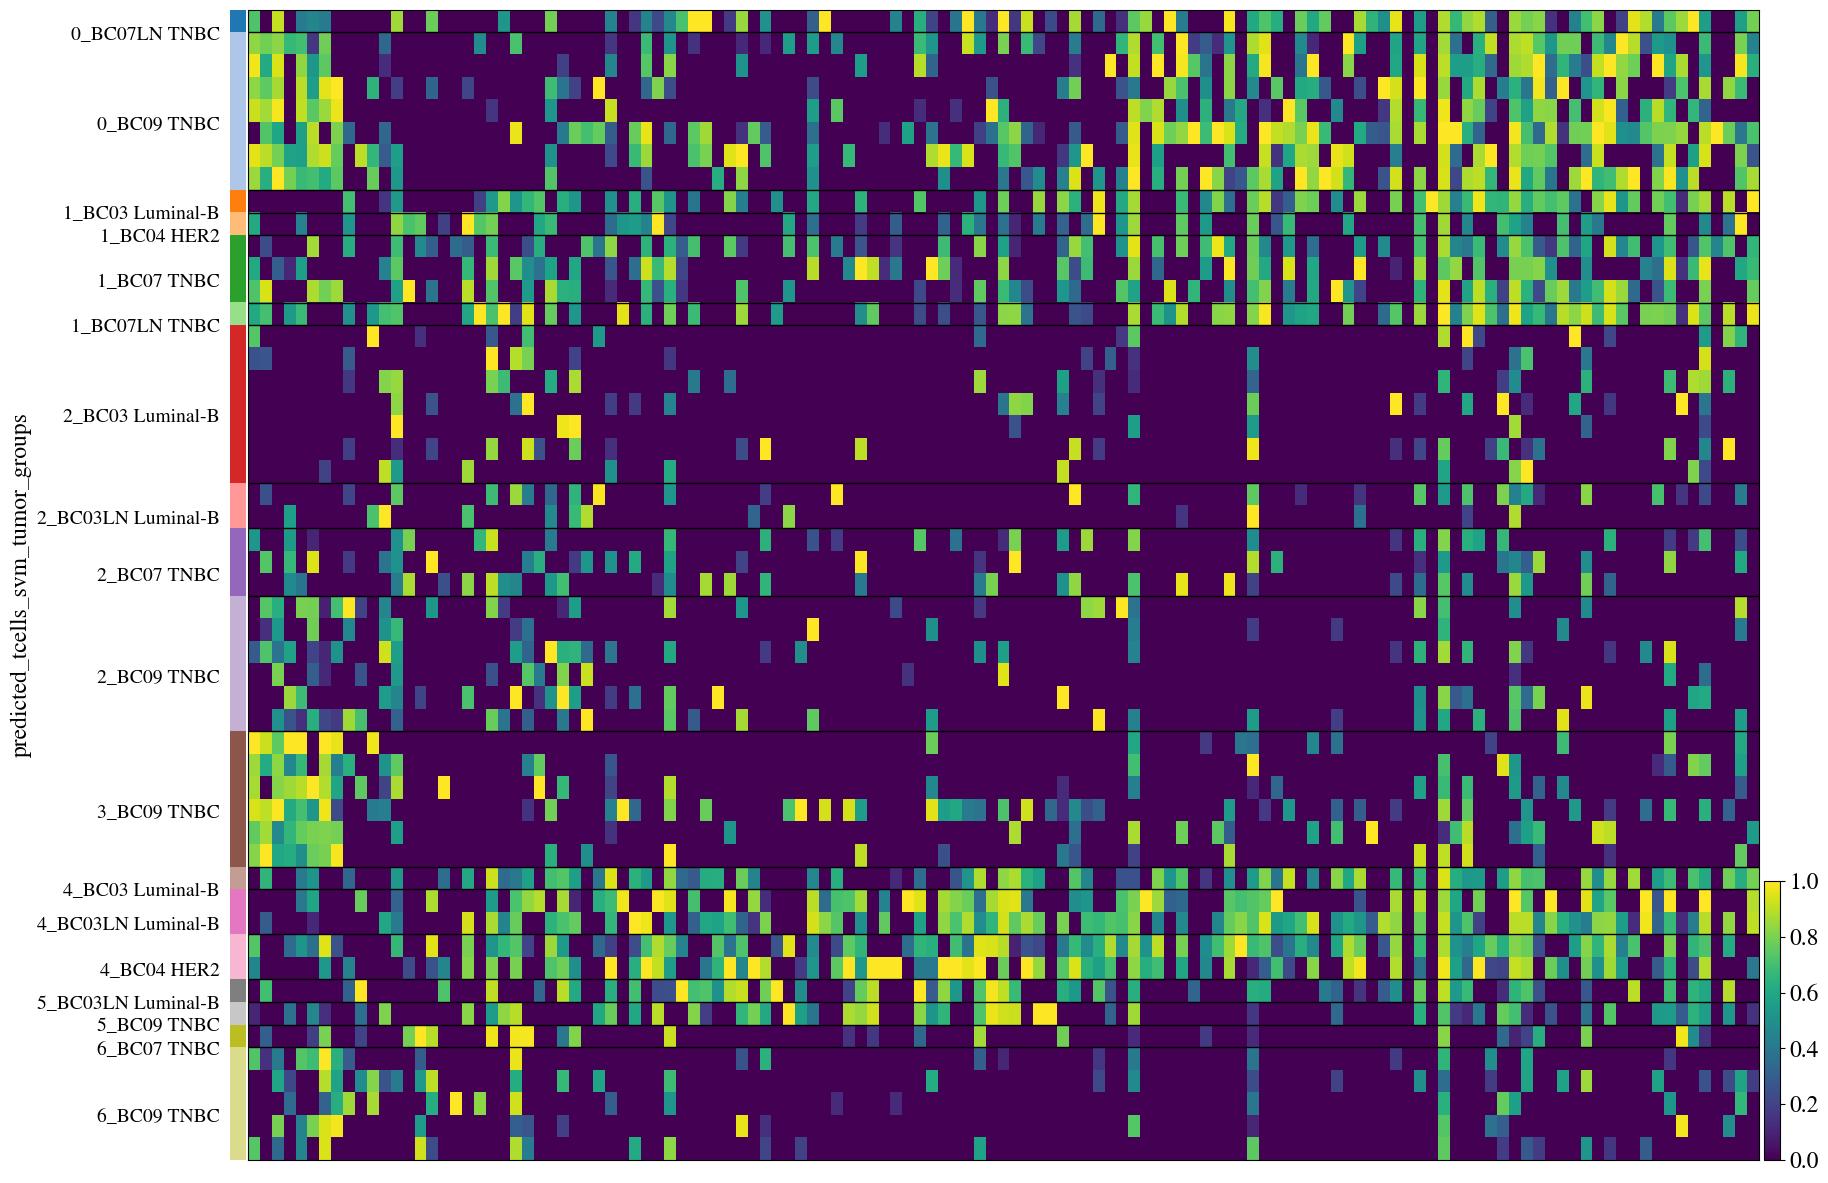

In [35]:
adata_tcells = set_the_class(adata_tcells, 'predicted_genes_svm', 'predicted_tcells_svm')

In [31]:
adata_tcells.obs['predicted_clusters_randomforest']

BC03_03       2
BC03_25       2
BC03_50       1
BC03_57       2
BC03_58       4
BC03_66       2
BC03_78       2
BC03_85       2
BC03_94       2
BC03LN_53     5
BC03LN_56     2
BC03LN_73     2
BC03LN_78     4
BC03LN_91     4
BC04_66       1
BC04_89       4
BC04_96       4
BC07_03       6
BC07_16       2
BC07_30       1
BC07_56       2
BC07_60       1
BC07_61       1
BC07_69       2
BC07LN_54     1
BC07LN_90     0
BC09_19       0
BC09_21       3
BC09_49       0
BC09_57       0
BC09_86       2
BC09_93       0
BC09_Re_03    3
BC09_Re_06    3
BC09_Re_07    0
BC09_Re_14    5
BC09_Re_15    6
BC09_Re_21    6
BC09_Re_37    2
BC09_Re_39    0
BC09_Re_41    0
BC09_Re_43    6
BC09_Re_54    2
BC09_Re_57    6
BC09_Re_60    3
BC09_Re_62    2
BC09_Re_66    3
BC09_Re_74    2
BC09_Re_83    3
BC09_Re_94    2
BC09_Re_95    6
Name: predicted_clusters_randomforest, dtype: category
Categories (7, object): ['0', '1', '2', '3', '4', '5', '6']